# Bit Flip Error correction through Quantum Repetition code

### Make all the neccessary imports

In [31]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import random

In [ ]:
q = QuantumRegister(3, 'data')  #data qubit --> 0 encoding qubit--> 1,2
a = QuantumRegister(2, 'ancilla')  #ancilla qubits (kinda llike parity)
c = ClassicalRegister(2, 'syndrome') #Syndrome
value = ClassicalRegister(3,'Result')
qc_corrected = QuantumCircuit(q,a,c,value)

#input state
qc_corrected.h(0)
qc_corrected.barrier()
#encoding
qc_corrected.cx(0,1)
qc_corrected.cx(0,2)
qc_corrected.x(random.randint(0,2)) #error (one only)
qc_corrected.barrier()
#syndrome measurement
qc_corrected.cx(0,a[0])
qc_corrected.cx(1,a[0])
qc_corrected.cx(1,a[1])
qc_corrected.cx(2,a[1])
qc_corrected.barrier()
qc_corrected.measure(a,c)
qc_corrected.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "data"), index=0>, <Qubit register=(3, "data"), index=1>, <Qubit register=(3, "data"), index=2>, <Qubit register=(2, "ancilla"), index=0>, <Qubit register=(2, "ancilla"), index=1>), clbits=())

## Here Lies the logic of quantum bit flip correction.

Based on the syndrome that we get from measuring the ancilla qubits (that act like parity bits) we can get the position of the bit flip error. This is called the "syndrome" since this is simialr to digital error correction technique where the syndrome gives us the position of the error. 

Now inorder to fix the error we place the X gate accordingly with the if_test() block in qiskit (newly added). This tests the value in the classical register 'c' with the expected syndrome and accordingly palces the x gate.

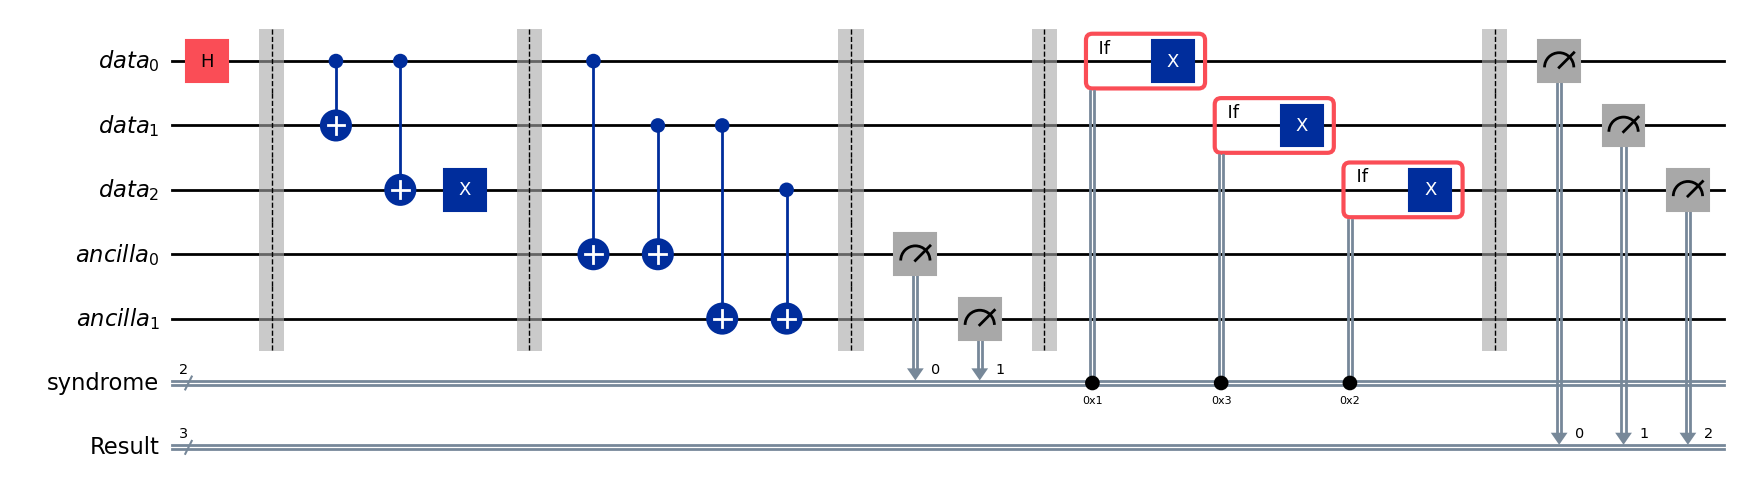

In [ ]:
#correction
"""Syndrome 00 --> no error
            01 --> error on q[0]
            11 --> error on q[1]
            10 --> error on q[2]
"""
with qc_corrected.if_test((c, 0b01)):
    qc_corrected.x(q[0])
with qc_corrected.if_test((c, 0b11)):
    qc_corrected.x(q[1])
with qc_corrected.if_test((c, 0b10)):
    qc_corrected.x(q[2])
qc_corrected.barrier()
qc_corrected.measure(q,value)
qc_corrected.draw('mpl')

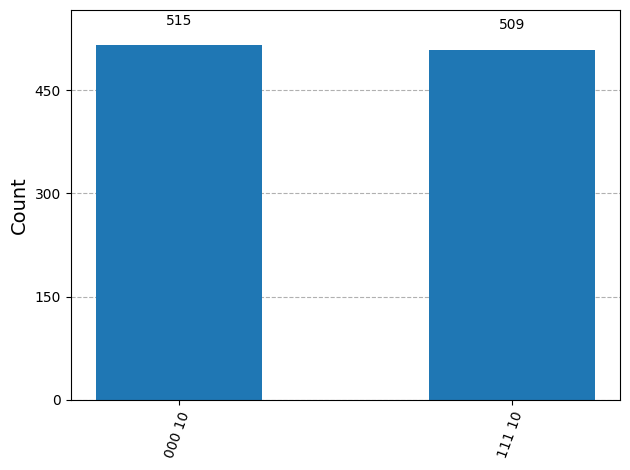

In [46]:
backend = AerSimulator()
job = backend.run(qc_corrected,shots=1024)
result = job.result()
counts = result.get_counts(qc_corrected)
plot_histogram(counts)